# Anomaly Detection in Market Mood Index and NIFTY Index

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

file_path = 'data/MMI_09-Jun-2024.csv'
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data.head()

,Date,Market Mood Index,Nifty Index
0,2024-06-07,51.525161,23290.15
1,2024-06-06,43.454809,22821.40
2,2024-06-05,35.283719,22620.35
3,2024-06-04,48.996059,21884.50
4,2024-06-03,59.844635,23263.90


## Anomaly Detection using Isolation Forest

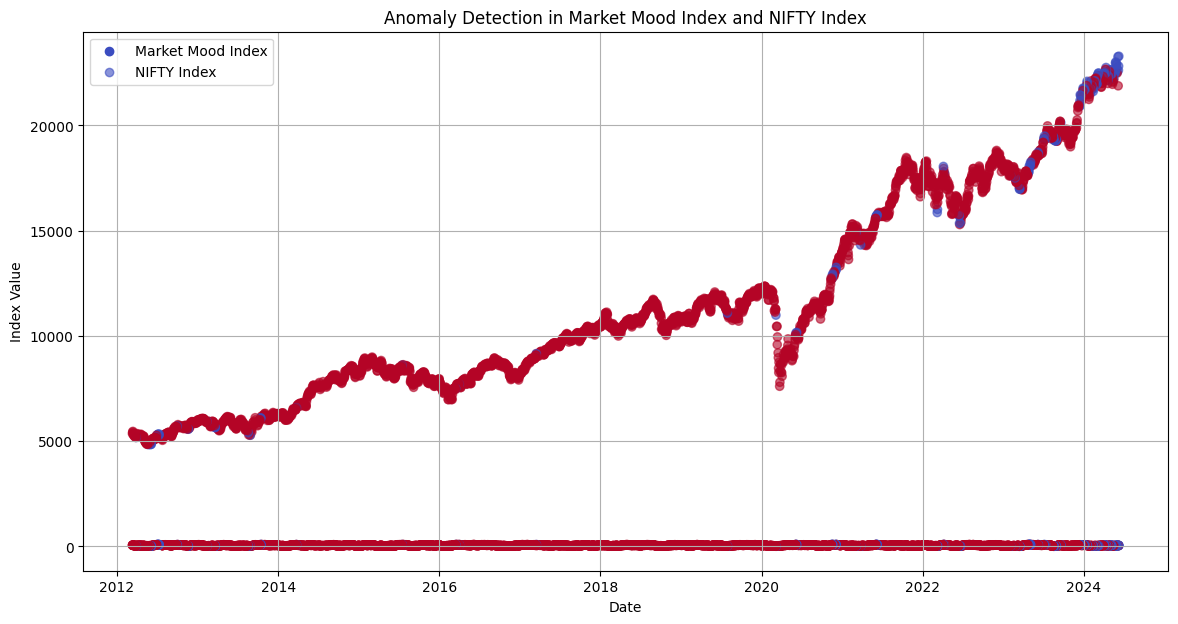

In [3]:
data.columns = [col.strip() for col in data.columns]
X = data[['Market Mood Index', 'Nifty Index']]

model = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = model.fit_predict(X)

plt.figure(figsize=(14, 7))
plt.scatter(data['Date'], data['Market Mood Index'], c=data['Anomaly'], cmap='coolwarm', label='Market Mood Index')
plt.scatter(data['Date'], data['Nifty Index'], c=data['Anomaly'], cmap='coolwarm', label='NIFTY Index', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Anomaly Detection in Market Mood Index and NIFTY Index')
plt.legend()
plt.grid(True)
plt.show()